# Dummy testers for code

In [4]:
import os
import datetime as dt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from scipy import odr

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

from sunpy.time import parse_time
import astropy.constants as aconst
import astropy.units as u

from seppy.loader.psp import psp_isois_load
from seppy.loader.soho import soho_load
from seppy.loader.stereo import stereo_load
from solo_epd_loader import epd_load  

import JTL_SEP_functions as jtl

from seppy.util import jupyterhub_data_path

In [6]:
startdate = dt.datetime(2021,5,28,22,19)
enddate = dt.datetime(2021,5,30,23,0)
data_path = f"{os.getcwd()}{os.sep}data/"
data_path = jupyterhub_data_path(data_path)

In [7]:
df = jtl.load_sc_data(['SOHO'], {'PSP':{'channels':[0]}}, [startdate,enddate],
                      data_path, False, False, '15min')





Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

soho_erne-hed_l2-1min_20210530_v01.cdf:   0%|          | 0.00/279k [00:00<?, ?B/s]

KeyError: 'SOHO'

In [8]:
def rms_mean(x_arr):
    """This function is used to 'resample' or average the uncertainty columns. Parts of this code were assisted by ChatGPT on 18Nov2025."""
    return np.sqrt(np.sum(x_arr**2)) / len(x_arr)  

In [9]:
dfp, dfe, meta = epd_load(sensor='het', level='l2', # [('H_Flux','H_Flux_n')] [('H_Uncertainty','H_Uncertainty_n')]
                                      startdate=startdate, enddate=enddate,
                                      viewing='omni', autodownload=True,
                                      pos_timestamp='start', path=data_path+'solo/')

solo_L2_epd-het-asun-rates_20210530_V01.cdf: 606kB [00:00, 776kB/s]
solo_L2_epd-het-north-rates_20210530_V01.cdf: 598kB [00:00, 925kB/s]
solo_L2_epd-het-south-rates_20210530_V01.cdf: 606kB [00:00, 972kB/s]
solo_L2_epd-het-sun-rates_20210530_V01.cdf: 606kB [00:00, 1.22MB/s]


In [12]:
sohodf, soho_meta = soho_load(dataset='SOHO_ERNE-HED_L2-1MIN', # 'PH_n' 'PHC_n'
                                       startdate=startdate, enddate=enddate,
                                       path=data_path+'soho/', resample=None,
                                       pos_timestamp='start')

In [19]:
sohodf.loc[:,('PH_0','PHC_0','est')]

,PH_0,PHC_0,est
Epoch,,,
2021-05-28 00:00:20.820,0.000442,2,16512
2021-05-28 00:01:20.773,0.000000,0,16512
2021-05-28 00:02:20.727,0.000000,0,16512
2021-05-28 00:03:20.680,0.000000,0,16512
2021-05-28 00:04:20.633,0.000442,2,16512
...,...,...,...
2021-05-30 23:55:58.369,0.005060,23,16512
2021-05-30 23:56:58.322,0.005830,27,16512
2021-05-30 23:57:58.275,0.002840,13,16512


In [15]:
df_new = sohodf.resample('5min').agg({'PH_0': 'mean', 'PHC_0': rms_mean, 'est': 'mean'})

In [16]:
df_new

,PH_0,PHC_0,est
Epoch,,,
2021-05-28 00:00:00,0.000177,0.565685,16512.0
2021-05-28 00:05:00,0.000137,0.447214,16512.0
2021-05-28 00:10:00,0.000135,0.346410,16512.0
2021-05-28 00:15:00,0.000133,0.346410,16512.0
2021-05-28 00:20:00,0.000091,0.282843,16512.0
...,...,...,...
2021-05-30 23:35:00,0.005300,10.928861,16512.0
2021-05-30 23:40:00,0.005222,11.038116,16512.0
2021-05-30 23:45:00,0.004828,10.101485,16512.0


In [ ]:
print(meta)
print(meta['H_Bins_Width'][10])
print(meta['H_Bins_Width'][11])
print(meta['H_Bins_Width'][12])

In [ ]:
bins = [3,4]
bin_width = []
for n in bins:
    binstr = str(meta['H_ENERGY_LABL'][n][0]).strip().split('-')
    print('The bin string is now: ', binstr)

    bin_start = float(binstr[0].strip())
    
    bin_end = binstr[-1].split('MeV')
    bin_end = float(bin_end[0].strip())
    
    
    bin_width.append(bin_end - bin_start)

print(bin_width)
        

In [ ]:
soho_meta['channels_dict_df_p'].loc[0, 'lower_E']

In [ ]:
str(psp_meta['H_ENERGY_LABL'][bins[0]][0]).split(' ')

In [8]:

def gauss_function(x, A, x0, sigma):
    """Function to calculate the Gaussian curve for scipy's methods."""
    return float(A * np.exp( -((x-x0)**2) / (2 * sigma**2) ))

In [9]:
# Quick plot of the gaussian curve

xx = range(0,100)
y = []
for n in xx:
    y.append( gauss_function(n, 100, 50, 20) )

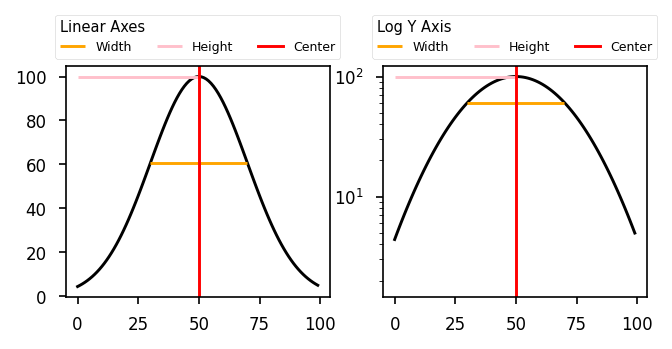

In [41]:
fig, ax = plt.subplots(1, 2, figsize=[5,2], dpi=150)

ax[0].plot(xx, y, color='k')
ax[0].hlines(y=0.6065*(100), xmin=50-20, xmax=50+20, label='Width', color='orange')
ax[0].hlines(y=100, xmin=0, xmax=50, label='Height', color='pink')
ax[0].axvline(x=50, label='Center', color='red')
ax[0].legend(title='Linear Axes', loc='upper center', framealpha=1.0, ncols=3, alignment='left', bbox_to_anchor=(0.5,1.25))

ax[1].semilogy(xx, y, color='k')
ax[1].hlines(y=0.6065*(100), xmin=50-20, xmax=50+20, label='Width', color='orange')
ax[1].hlines(y=100, xmin=0, xmax=50, label='Height', color='pink')
ax[1].axvline(x=50, label='Center', color='red')
ax[1].legend(title='Log Y Axis', loc='upper center', framealpha=1.0, ncols=3, alignment='left', bbox_to_anchor=(0.5,1.25))

plt.savefig('GaussianCurveExamples.png')
plt.show()